In [25]:
import pandas as pd
import seaborn as sns
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [33]:
rating = pd.read_csv('ratings.csv')
rating = rating.fillna(0)
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [29]:
movie_titles = pd.read_csv('movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings = pd.DataFrame(rating.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [9]:
rating.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

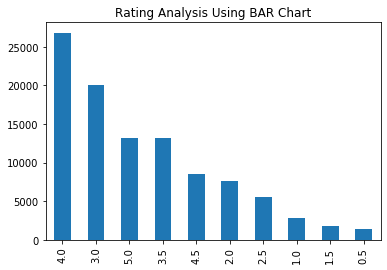

In [34]:
rating.rating.value_counts().plot.bar(title="Rating Analysis Using BAR Chart")

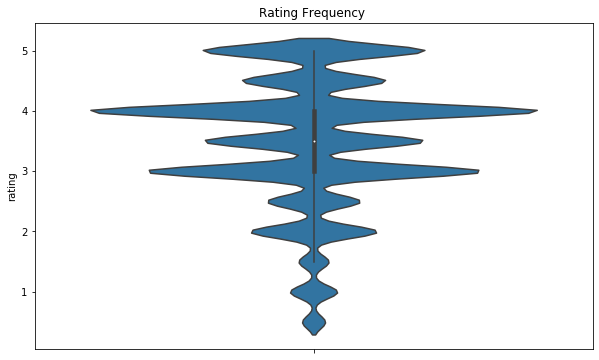

In [18]:

plt.figure(figsize=(10,6))
plt.title("Rating Frequency ")
sns.axes_style("dark")
sns.violinplot(y=rating["rating"])
plt.show()

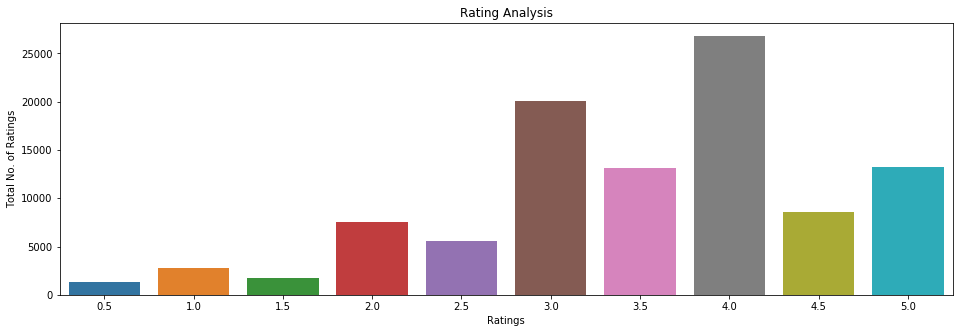

In [17]:
import nltk

from nltk.probability import FreqDist

b = nltk.FreqDist(rating.rating)
e = pd.DataFrame({'name': list(b.keys()), 'rating': list(b.values())}) 
e = e.nlargest(columns="rating", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "name", y = "rating")
ax.set(ylabel = 'Total No. of Ratings') 
ax.set(xlabel = 'Ratings') 
ax.set(title="Rating Analysis")
plt.show()

In [19]:
user_ratings =rating.pivot_table(index=['userId'],columns=['title'],values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
user_ratings = user_ratings.dropna(thresh=10,axis=1).fillna(0)
user_ratings

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,3.5,0.0


In [22]:
item_similarity=user_ratings.corr(method='pearson')
item_similarity.head(50)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


In [23]:
def get_movies(movie_name,user_rating):
    score=item_similarity[movie_name]*(user_rating-2.5)
    score=score.sort_values(ascending=False)
     
    return score

In [35]:
Recom =[("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",5),
       ("12 Years a Slave (2013)",4),("2012 (2009)",3)]
        
getmovies = pd.DataFrame()

for movie,rating in Recom :
    getmovies=getmovies.append(get_movies(movie,rating),ignore_index=True)
    
getmovies.head()
getmovies.sum().sort_values(ascending=False)

2 Fast 2 Furious (Fast and the Furious 2, The) (2003)         2.704922
12 Years a Slave (2013)                                       1.681464
Fast and the Furious, The (2001)                              1.661849
Fast & Furious (Fast and the Furious 4, The) (2009)           1.624116
Mission: Impossible III (2006)                                1.564542
                                                                ...   
Madness of King George, The (1994)                           -0.167709
Like Water for Chocolate (Como agua para chocolate) (1992)   -0.174538
Postman, The (Postino, Il) (1994)                            -0.187298
Piano, The (1993)                                            -0.228324
Clear and Present Danger (1994)                              -0.249059
Length: 2269, dtype: float64